## 2. Machine Learning for Regression


In [6]:
import pandas as pd
import numpy as np

## 2.2 Data preparation

In [65]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [67]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


## 2.3 Exploratory data analysis

##### Distribution of fuel_efficiency_mpg

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

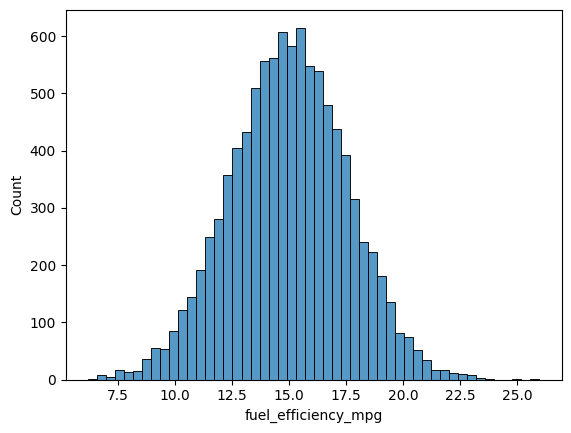

In [69]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

# Question 1
There's one column with missing values. What is it?

horsepower

In [70]:
df=df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

for col in df.columns:
    print(col)
    print("Sample: ",df[col].unique()[:5])
    print("Unique: ", df[col].nunique())
    print("Null: ", df[col].isnull().sum())
    print()

engine_displacement
Sample:  [170 130 220 210 190]
Unique:  36
Null:  0

horsepower
Sample:  [159.  97.  78.  nan 140.]
Unique:  192
Null:  708

vehicle_weight
Sample:  [3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
Unique:  9704
Null:  0

model_year
Sample:  [2003 2007 2018 2009 2008]
Unique:  24
Null:  0

fuel_efficiency_mpg
Sample:  [13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
Unique:  9704
Null:  0



# Question 2
What's the median (50% percentile) for variable 'horsepower'?

#### Answer: 149



In [71]:
df['horsepower'].describe()

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

### Prepare and split the dataset

In [72]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [73]:
n, n_val, n_test, n_train

(9704, 1940, 1940, 5824)

In [74]:
df.iloc[[1, 78, 51, 32]]

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
1,130,97.0,3149.664934,2007,13.688217
78,260,111.0,3582.774204,2015,10.954906
51,270,152.0,2730.947104,2015,15.820982
32,40,136.0,3619.370730,2017,11.029371


In [75]:
idx = np.arange(n)

In [76]:
np.random.seed(42)
np.random.shuffle(idx)

In [77]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [78]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [79]:
len(df), len(df_train), len(df_val), len(df_test)

(9704, 5824, 1940, 1940)

In [80]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

# Question 3
We need to deal with missing values for the column from Q1.</br>
We have two options: fill it with 0 or with the mean of this variable.</br>
Try both options. For each, train a linear regression model without regularization using the code from the lessons.</br>
For computing the mean, use the training only!</br>
Use the validation dataset to evaluate the models and compare the RMSE of each option.</br>
Round the RMSE scores to 2 decimal digits using round(score, 2)</br>
Which option gives better RMSE?</br>
#### Answer: With mean</br>

0.4624412137959964 (Mean) << 0.5202614265099076 (Zeros)



In [34]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [16]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [47]:
rmse(y_train, y_pred)

np.float64(0.5202614265099076)

In [81]:
def run_variant(X_train,y_train,X_val,y_val, name):
    print("Running variant",name)
    w0, w = train_linear_regression(X_train, y_train)
    print("Wo",w0)
    print("W",w)
    y_pred = w0 + X_val.dot(w)
    RMSE = rmse(y_val, y_pred)
    print("RMSE", RMSE)
    return {"y_pred":y_pred,"RMSE":RMSE}

Running variant Fill zeros
Wo 28.82736547365895
W [ 9.93613218e-05  3.54221891e-03 -5.01328015e-03  3.42992870e-04]
RMSE 0.5173782638844466


<Axes: ylabel='Count'>

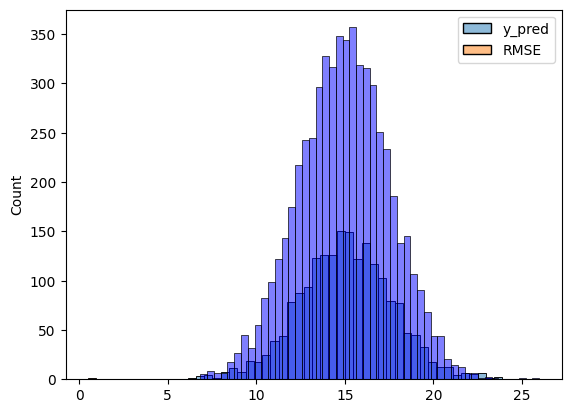

In [83]:
base = ['engine_displacement','horsepower','vehicle_weight','model_year']

# Fill zeros
X_train = df_train[base].fillna(0).values
X_val = df_val[base].fillna(0).values

y_pred=run_variant(X_train,y_train,X_val,y_val, "Fill zeros")

sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)


Running variant Fill zeros
Wo 28.925259951002698
W [ 0.00012093  0.01030308 -0.00501009 -0.00023463]
RMSE 0.4635965042334585


<Axes: ylabel='Count'>

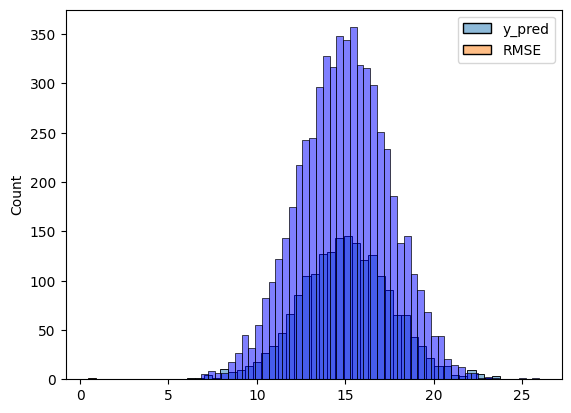

In [86]:
base = ['engine_displacement','horsepower','vehicle_weight','model_year']

# Mean
mean_val=df_train.mean(numeric_only=True)
X_train = df_train[base].fillna(mean_val).values
X_val = df_val[base].fillna(mean_val).values

y_pred=run_variant(X_train,y_train,X_val,y_val, "Fill zeros")

sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)


# Question 4
Now let's train a regularized linear regression. </br>
For this question, fill the NAs with 0.</br>
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].</br>
Use RMSE to evaluate the model on the validation dataset.</br>
Round the RMSE scores to 2 decimal digits.</br>
Which r gives the best RMSE?</br>
If multiple options give the same best RMSE, select the smallest r.</br>

#### Answer 0.01

In [87]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [94]:
def run_variant_reg(X_train,y_train,X_val,y_val, name, r=0.001):
    print("Variant: ",name)
    w0, w = train_linear_regression_reg(X_train, y_train,r)
    y_pred = w0 + X_val.dot(w)
    RMSE=rmse(y_val, y_pred)
    print("RMSE",RMSE )
    return {"y_pred":y_pred,"RMSE":RMSE,"w0":w0,"w":w}
    

In [95]:
rs=[0, 0.01, 0.1, 1, 5, 10, 100]

X_train = df_train[base].fillna(0).values
X_val=df_val[base].fillna(0).values

for r in rs:
    name=f"Reg param {r}"
    run_variant_reg(X_train,y_train,X_val,y_val,name, r)
    

Variant:  Reg param 0
RMSE 0.5173782638844466
Variant:  Reg param 0.01
RMSE 0.5171115525769823
Variant:  Reg param 0.1
RMSE 0.5187525130702517
Variant:  Reg param 1
RMSE 0.5222348802093141
Variant:  Reg param 5
RMSE 0.522891609282361
Variant:  Reg param 10
RMSE 0.5229812979636599
Variant:  Reg param 100
RMSE 0.5230636233819933


# Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score. </br>
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]. </br>
For each seed, do the train/validation/test split with 60%/20%/20% distribution.</br>
Fill the missing values with 0 and train a model without regularization.</br>
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.</br>
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.</br>
Round the result to 3 decimal digits (round(std, 3))</br>
What's the value of std?</br>
### Answer: 
0.001
0.006
0.060
0.600
</br>
Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [61]:
base = ['engine_displacement','horsepower','vehicle_weight','age']

def prepare_data(s=42):
    df=pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
    df=df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]
    df['age'] = df['model_year'].max() - df['model_year']
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    n = len(df)
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    return df_train,y_train,df_val,y_val,df_test,y_test
    

In [53]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [54]:
def run_variant(X_train,y_train, X_val,y_val, name):
    print("Variant: ",name)
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)
    RMSE = rmse(y_val, y_pred)
    print("RMSE", RMSE)
    return {"y_pred":y_pred,"RMSE":RMSE,"w0":w0,"w":w}

In [57]:
seeds=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_array=[]
for s in seeds:
    df_train,y_train,df_val,y_val,df_test,y_test=prepare_data(s)
    X_train = df_train[base].fillna(0).values
    X_val=df_val[base].fillna(0).values
    name=f"Seed {s}"
    res=run_variant(X_train,y_train,X_val,y_val,name)
    rmse_array.append(res['RMSE'])
std=np.std(rmse_array)
round(std, 3)

5824 1940 1940
Variant:  Seed 0
RMSE 0.5206531296298024
5824 1940 1940
Variant:  Seed 1
RMSE 0.5213388912856988
5824 1940 1940
Variant:  Seed 2
RMSE 0.5228069974802021
5824 1940 1940
Variant:  Seed 3
RMSE 0.5159516741173531
5824 1940 1940
Variant:  Seed 4
RMSE 0.5109129460065376
5824 1940 1940
Variant:  Seed 5
RMSE 0.5283406460165985
5824 1940 1940
Variant:  Seed 6
RMSE 0.5313910658170704
5824 1940 1940
Variant:  Seed 7
RMSE 0.5090670387374364
5824 1940 1940
Variant:  Seed 8
RMSE 0.5147399129350915
5824 1940 1940
Variant:  Seed 9
RMSE 0.5131865908331025


np.float64(0.007)

# Question 6
Split the dataset like previously, use seed 9. </br>
Combine train and validation datasets.</br>
Fill the missing values with 0 and train a model with r=0.001.</br>
What's the RMSE on the test dataset? </br>
Options:

#### Answer 0.515


In [64]:
df_train,y_train,df_val,y_val,df_test,y_test=prepare_data(9)

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

X_full_train = df_full_train[base].fillna(0).values
X_test=df_test[base].fillna(0).values

y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(X_full_train, y_full_train,0.001)
y_pred = w0 + X_test.dot(w)
RMSE = rmse(y_test, y_pred)
print("RMSE", RMSE)


RMSE 0.5156120466461953
